In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from gofish import imagecube
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 2.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.5})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.5})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.5})
plt.rcParams.update({'ytick.minor.width': 1.5})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
freq7  = 3.38228441e11
freq6  = 2.29612176e11
freq3  = 9.75043346e10
freqKa = 3.30005835e10

In [5]:
disc_PA   = 11.28   #PA from Cathie's paper
disc_inc  = 49.24   #inclination from Cathie's paper
disc_dist = 160.318 #pc

In [6]:
def dist_au(x):
    """ Conversion from arcsec to au. """
    return x*disc_dist

In [7]:
def dist_arcsec(x):
    """ Conversion from au to arcsec. """
    return x*disc_dist**-1

In [8]:
def gaussian(x,mean,sigma):
    """ Gaussian function with prescribed mean (mean) and standard deviation (sigma). """
    return 0.05*np.exp(-0.5*(x - mean)**2/sigma**2) + 2.5e-2

In [9]:
def alpha(y0,y1,nu0,nu1):
    """ Spectral index. """
    return np.log(y0/y1)/np.log(nu0/nu1)

def uncr_alpha(y0,y1,dy0,dy1,nu0,nu1):
    """ Spectral index error. """
    return np.hypot(dy0/y0,dy1/y1)/np.log(nu0/nu1)

In [10]:
def scaled_rms(x,rms,beam_size):
    """ Rescale RMS by number of beams per radius. """
    circ    = 2.*np.pi*x                 #au
    n_beams = circ/(beam_size*disc_dist)
    
    return rms/np.sqrt(n_beams)

In [11]:
import matplotlib.colors as colors
import matplotlib.cm as cm

interval  = np.linspace(-1.,3.,6)
cmap      = plt.get_cmap('plasma') 
norm      = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)

color1    = scalarMap.to_rgba(interval[1])
color2    = scalarMap.to_rgba(interval[3])
color3    = scalarMap.to_rgba(interval[4])

In [12]:
cubeB7  = imagecube('./smoothed_band7_-0.5robust/CI_Tau_LB_band7_initcont_cent_-0.5robust_1.0sigma.image.tt0.fits', FOV=4.)

x7, y7, dy7 = cubeB7.radial_profile(inc=disc_inc, PA=disc_PA, dr=2.*0.0058)
print(cubeB7.bmaj, cubeB7.bmin)

x7 *= disc_dist

y7_b    = cubeB7.jybeam_to_Tb_RJ(y7)
dy7_b   = cubeB7.jybeam_to_Tb_RJ(dy7)

rmsB7   = cubeB7.jybeam_to_Tb_RJ(7.17e-5) #Jy/beam
errorB7 = scaled_rms(x=x7, rms=rmsB7, beam_size=cubeB7.bmin)

cubeB6  = imagecube('./smoothed_band7_-0.5robust/CI_Tau_LB_band6_new_initcont_cent_0.5robust_1.0sigma.image.tt0.fits', FOV=4.)

x6, y6, dy6 = cubeB6.radial_profile(inc=disc_inc, PA=disc_PA, dr=2.*0.0058)
print(cubeB6.bmaj, cubeB6.bmin)

x6 *= disc_dist

y6_b    = cubeB6.jybeam_to_Tb_RJ(y6)
dy6_b   = cubeB6.jybeam_to_Tb_RJ(dy6)

rmsB6   = cubeB6.jybeam_to_Tb_RJ(1.13e-5) #Jy/beam
errorB6 = scaled_rms(x=x6, rms=rmsB6, beam_size=cubeB6.bmin)

cubeB3  = imagecube('./smoothed_band7_-0.5robust/CI_Tau_LB_band3_initcont_cent_PSsub_0.25robust_1.0sigma.image.tt0.fits', FOV=4.)

x3, y3, dy3 = cubeB3.radial_profile(inc=disc_inc, PA=disc_PA, dr=2.*0.0058)
print(cubeB3.bmaj, cubeB3.bmin)

x3 *= disc_dist

y3_b    = cubeB3.jybeam_to_Tb_RJ(y3)
dy3_b   = cubeB3.jybeam_to_Tb_RJ(dy3)

rmsB3   = cubeB3.jybeam_to_Tb_RJ(6.74e-6) #Jy/beam
errorB3 = scaled_rms(x=x3, rms=rmsB3, beam_size=cubeB3.bmin)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.08713748306037601 0.058197230100648
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.08713727985258 0.058197052908396
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.087137251934184 0.058196925989856006


In [13]:
cubeB7195mas = imagecube('./smoothed_bandKa_0.195arcsec/CI_Tau_LB_band7_initcont_cent_0.75robust_1.0sigma_uvtapered_smoothed.image.tt0.fits', FOV=4.)

xKa7, yKa7, dyKa7 = cubeB7195mas.radial_profile(inc=disc_inc, PA=disc_PA, dr=0.0195)
print(cubeB7195mas.bmaj, cubeB7195mas.bmin)

xKa7 *= disc_dist

yKa7_b   = cubeB7195mas.jybeam_to_Tb_RJ(yKa7)
dyKa7_b  = cubeB7195mas.jybeam_to_Tb_RJ(dyKa7)

rmsBKa7   = cubeB7195mas.jybeam_to_Tb_RJ(5.72e-5) #Jy/beam 
errorBKa7 = scaled_rms(x=xKa7, rms=rmsBKa7, beam_size=cubeB7195mas.bmin)

cubeB6195mas = imagecube('./smoothed_bandKa_0.195arcsec/CI_Tau_LB_band6_new_initcont_cent_1.5robust_1.0sigma_uvtapered_smoothed.image.tt0.fits', FOV=4.)

xKa6, yKa6, dyKa6 = cubeB6195mas.radial_profile(inc=disc_inc, PA=disc_PA, dr=0.0195)
print(cubeB6195mas.bmaj, cubeB6195mas.bmin)

xKa6 *= disc_dist

yKa6_b   = cubeB6195mas.jybeam_to_Tb_RJ(yKa6)
dyKa6_b  = cubeB6195mas.jybeam_to_Tb_RJ(dyKa6)

rmsBKa6   = cubeB6195mas.jybeam_to_Tb_RJ(1.64e-5) #Jy/beam
errorBKa6 = scaled_rms(x=xKa6, rms=rmsBKa6, beam_size=cubeB6195mas.bmin)

cubeB3195mas = imagecube('./smoothed_bandKa_0.195arcsec/CI_Tau_LB_band3_initcont_cent_PSsub_0.75robust_1.0sigma_uvtapered_smoothed.image.tt0.fits', FOV=4.)

xKa3, yKa3, dyKa3 = cubeB3195mas.radial_profile(inc=disc_inc, PA=disc_PA, dr=0.0195)
print(cubeB3195mas.bmaj, cubeB3195mas.bmin)

xKa3 *= disc_dist

yKa3_b   = cubeB3195mas.jybeam_to_Tb_RJ(yKa3)
dyKa3_b  = cubeB3195mas.jybeam_to_Tb_RJ(dyKa3)

rmsBKa3   = cubeB3195mas.jybeam_to_Tb_RJ(6.95e-6) #Jy/beam
errorBKa3 = scaled_rms(x=xKa3, rms=rmsBKa3, beam_size=cubeB3195mas.bmin)

cubeKa195mas = imagecube('./smoothed_bandKa_0.195arcsec/CITau_VLA_Ka_PSsub_1.7Mlam_1.5robust_1.0sigma_uvtapered_smoothed.image.tt0.fits', FOV=4.)

xKa, yKa, dyKa = cubeKa195mas.radial_profile(inc=disc_inc, PA=disc_PA, dr=0.0195)
print(cubeKa195mas.bmaj, cubeKa195mas.bmin)

xKa *= disc_dist

yKa_b   = cubeKa195mas.jybeam_to_Tb_RJ(yKa)
dyKa_b  = cubeKa195mas.jybeam_to_Tb_RJ(dyKa)

rmsKa   = cubeKa195mas.jybeam_to_Tb_RJ(1.61e-6) #Jy/beam
errorKa = scaled_rms(x=xKa, rms=rmsKa, beam_size=cubeKa195mas.bmin)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.194802624210852 0.194673997598904
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.194764884072372 0.19460954164337999
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.19478237499306 0.194388764134644
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
0.194653380169584 0.19441692972828


<IPython.core.display.Javascript object>


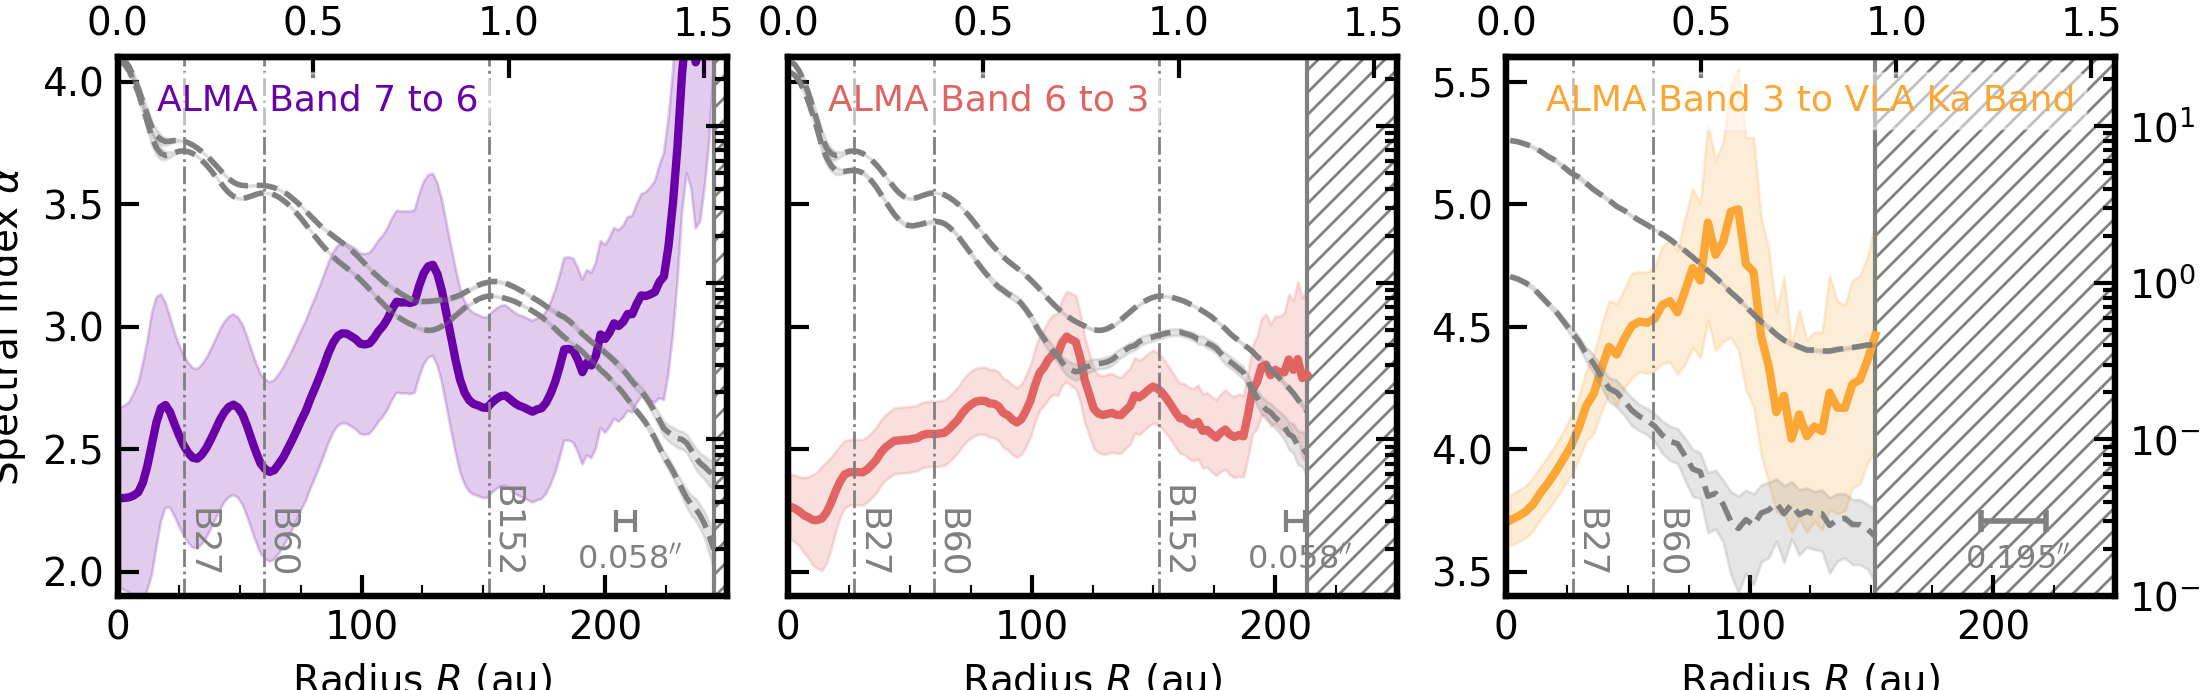

244.5490772
212.9343676
5 sigma cut 82.84432650000001
3 sigma cut 151.62074850000002


In [14]:
fig, axs = plt.subplots(1,2,figsize=(11,3.45),gridspec_kw={"width_ratios":[2.25,1.]})

fig.tight_layout()

#Initialise plot:
subplots_left = gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=axs[0],wspace=0.1,width_ratios=[1,1])
axs = [plt.subplot(subplots_left[0]),plt.subplot(subplots_left[1]),axs[1]]
    
ays = [axs[i].twinx() for i in range(len(axs))]

#Determine spectral indices:
alpha76      = alpha(y0=y7, y1=y6, nu0=freq7, nu1=freq6)
uncr_alpha76 = uncr_alpha(
    y0=y7, y1=y6, dy0=np.hypot(dy7,0.10*y7), dy1=np.hypot(dy6,0.10*y6), nu0=freq7, nu1=freq6
)
errm_alpha76 = uncr_alpha(y0=y7, y1=y6, dy0=dy7, dy1=dy6, nu0=freq7, nu1=freq6)

alpha63      = alpha(y0=y6, y1=y3, nu0=freq6, nu1=freq3)
uncr_alpha63 = uncr_alpha(
    y0=y6, y1=y3, dy0=np.hypot(dy6,0.10*y6), dy1=np.hypot(dy3,0.05*y3), nu0=freq6, nu1=freq3
)
errm_alpha63 = uncr_alpha(y0=y6, y1=y3, dy0=dy6, dy1=dy3, nu0=freq6, nu1=freq3)

alpha3Ka      = alpha(y0=yKa3, y1=yKa, nu0=freq3, nu1=freqKa)
uncr_alpha3Ka = uncr_alpha(
    y0=yKa3, y1=yKa, dy0=np.hypot(dyKa3,0.05*yKa3), dy1=np.hypot(dyKa,0.10*yKa), nu0=freq3, nu1=freqKa
)
errm_alpha3Ka = uncr_alpha(y0=yKa3, y1=yKa, dy0=dyKa3, dy1=dyKa, nu0=freq3, nu1=freqKa)

#Plot spectral indices and sensitivity limits for...
#... alpha_B7-B6:
x_cut = min(
    x6[np.logical_and(y6_b <= 5.*errorB6, x6 >= 1.0*disc_dist)][0],
    x7[np.logical_and(y7_b <= 5.*errorB7, x7 >= 1.0*disc_dist)][0],
)
print(x_cut)
#x_cut = min(
#    x6[np.logical_and(y6 <= 5.*scaled_rms(x=x6, rms=1.13e-5, beam_size=cubeB6.bmin), x6 >= 1.0*disc_dist)][0],
#    x7[np.logical_and(y7 <= 5.*scaled_rms(x=x7, rms=7.17e-5, beam_size=cubeB7.bmin), x7 >= 1.0*disc_dist)][0],
#)
#print(x_cut)

axs[0].fill_between([x_cut,2*disc_dist],0,100,hatch='///',fc='white',ec='gray',zorder=-1)
axs[0].axvline(x_cut,color='gray')

#ays[0].plot(x6,5.*errorB6,ls=':',c='k')

mask = x6<=x_cut

l, = axs[0].plot(x7[mask], alpha76[mask], lw=3, label=r'$\alpha_{\rm B7-B6}$', color=color1)
axs[0].fill_between(x7[mask], (alpha76 - uncr_alpha76)[mask], (alpha76 + uncr_alpha76)[mask], alpha=0.2, color=l.get_color())

l, = ays[0].semilogy(x7[mask], y7_b[mask], c='gray', lw=2., ls='--')
ays[0].fill_between(x7[mask], (y7_b - dy7_b)[mask], (y7_b + dy7_b)[mask], alpha=0.2, color=l.get_color())

ays[0].semilogy(x6[mask], y6_b[mask], c='gray', lw=2., ls='--')
ays[0].fill_between(x6[mask], (y6_b - dy6_b)[mask], (y6_b + dy6_b)[mask], alpha=0.2, color=l.get_color())

#... alpha_B6-B3:
x_cut = min(
    x3[np.logical_and(y3_b <= 5.*errorB3, x3 >= 1.0*disc_dist)][0],
    x6[np.logical_and(y6_b <= 5.*errorB6, x6 >= 1.0*disc_dist)][0]
)
print(x_cut)
#x_cut = min(
#    x3[np.logical_and(y3 <= 5.*scaled_rms(x=x3, rms=6.74e-6, beam_size=cubeB3.bmin), x3 >= 1.0*disc_dist)][0],
#    x6[np.logical_and(y6 <= 5.*scaled_rms(x=x6, rms=1.13e-5, beam_size=cubeB6.bmin), x6 >= 1.0*disc_dist)][0]
#)
#print(x_cut)

axs[1].fill_between([x_cut,2*disc_dist],0,100,hatch='///',fc='white',ec='gray',zorder=-1)
axs[1].axvline(x_cut,color='gray')

#ays[1].plot(x3,5.*errorB3,ls=':',c='k')

mask = x3<=x_cut

l, = axs[1].plot(x7[mask], alpha63[mask], lw=3, label=r'$\alpha_{\rm B6-B3}$', color=color2)
axs[1].fill_between(x7[mask], (alpha63 - uncr_alpha63)[mask], (alpha63 + uncr_alpha63)[mask], alpha=0.2, color=l.get_color())

l, = ays[1].semilogy(x6[mask], y6_b[mask], c='gray', lw=2., ls='--')
ays[1].fill_between(x6[mask], (y6_b - dy6_b)[mask], (y6_b + dy6_b)[mask], alpha=0.2, color=l.get_color())

ays[1].semilogy(x3[mask], y3_b[mask], c='gray', lw=2., ls='--')
ays[1].fill_between(x3[mask], (y3_b - dy3_b)[mask], (y3_b + dy3_b)[mask], alpha=0.2, color=l.get_color())

#alpha_B3-BKa:
x_cut = xKa[np.logical_and(yKa_b <= 5*errorKa, xKa >= 0.1*disc_dist)][0]
print(r'5 sigma cut', x_cut)
#axs[2].axvline(x_cut,color='gray')
x_cut = xKa[np.logical_and(yKa_b <= 3*errorKa, xKa >= 0.7*disc_dist)][0]
print(r'3 sigma cut', x_cut)
#axs[2].axvline(x_cut,color='gray')

axs[2].fill_between([x_cut,2*disc_dist],0,100,hatch='///',fc='white',ec='gray',zorder=-1)
axs[2].axvline(x_cut,color='gray')

#ays[2].plot(xKa,3*errorKa,ls=':',c='k')

mask = xKa<=x_cut

l, = axs[2].plot(xKa[mask], alpha3Ka[mask], lw=3, label=r'$\alpha_{\rm B3-BKa}$', color=color3)
axs[2].fill_between(xKa[mask], (alpha3Ka - uncr_alpha3Ka)[mask], (alpha3Ka + uncr_alpha3Ka)[mask], alpha=0.2, color=l.get_color())

l, = ays[2].semilogy(xKa3[mask], yKa3_b[mask], c='gray', lw=2., ls='--')
ays[2].fill_between(xKa3[mask], (yKa3_b - dyKa3_b)[mask], (yKa3_b + dyKa3_b)[mask], alpha=0.2, color=l.get_color())

ays[2].semilogy(xKa[mask], yKa_b[mask], c='gray', lw=2., ls='--')
ays[2].fill_between(xKa[mask], (yKa_b - dyKa_b)[mask], (yKa_b + dyKa_b)[mask], alpha=0.2, color=l.get_color())

#x_cut = xKa[np.logical_and(yKa_b <= 5*error, xKa >= 0.1*disc_dist)][0]
#axs[2].axvline(x_cut,color='gray')

for i in range(len(axs)):
    axs[i].axvline(0.170*disc_dist,ls='-.',color='gray',lw=1.)
    axs[i].axvline(0.375*disc_dist,ls='-.',color='gray',lw=1.)
    
    axs[i].set_xlim(0.,250.)

    axs[i].set_xlabel(r"Radius $R$ (au)")
    ays[i].set_ylim(1e-2,np.amax(y7_b))
    
    # axs[i].legend(loc='upper right')  
    
    # Build secondary axes to show radius in arcsec
    secax = axs[i].secondary_xaxis('top', functions=(dist_arcsec, dist_au))
    # secax.xaxis.set_minor_locator(MultipleLocator(0.25))
    # secax.xaxis.tick_params(which='minor', color='w', length=3., width=1.)
    #if idx == 0:
    secax.set_xlabel("Radius $R\ ('')$", labelpad=8)
    
    axs[i].xaxis.set_ticks([0,100,200])
    axs[i].xaxis.set_minor_locator(MultipleLocator(25))
    axs[i].tick_params(which='minor', color='k', length=4., width=0.75)
    axs[i].tick_params(axis='x',which='both',top=False,labeltop=False)

    if i < 2:
        axs[i].axvline(0.950*disc_dist,ls='-.',color='gray',lw=1.)

        axs[i].text(0.170*disc_dist,2.,f'B{0.170*disc_dist:1.0f}',rotation=270,color='gray',fontsize=13)
        axs[i].text(0.375*disc_dist,2.,f'B{0.375*disc_dist:1.0f}',rotation=270,color='gray',fontsize=13)
        axs[i].text(0.950*disc_dist,2.,f'B{0.950*disc_dist:1.0f}',rotation=270,color='gray',fontsize=13)
        
        #z = np.linspace(1.225,1.475,200)*disc_dist
        #ays[i].plot(z,gaussian(z,mean=1.35*disc_dist,sigma=cubeB7.bmin*disc_dist/(2*np.sqrt(2*np.log(2)))),lw=2,c='gray')
        #t = ays[i].text(1.225*disc_dist,1.5e-2,f'{cubeB7.bmin:0.3f}' + "$''$",c='gray',fontsize=11.5)
        ## t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round'))

        ays[i].errorbar(
            1.30*disc_dist,3.0e-2,xerr=cubeB7.bmin*disc_dist/(2*np.sqrt(2*np.log(2))),
            ls='none',lw=1.5,c='gray',capsize=4,capthick=1.5
        )
        t = ays[i].text(1.175*disc_dist,1.5e-2,f'{cubeB7.bmin:0.3f}' + "$''$",c='gray',fontsize=11.5)
        
        ays[i].tick_params(which='both',labelright=False)
        axs[i].set_ylim(1.9,4.1)
    else:
        axs[i].text(0.170*disc_dist,3.5,f'B{0.170*disc_dist:1.0f}',rotation=270,color='gray',fontsize=13)
        axs[i].text(0.375*disc_dist,3.5,f'B{0.375*disc_dist:1.0f}',rotation=270,color='gray',fontsize=13)
        
        #z = np.linspace(1.0,1.5,200)*disc_dist
        #ays[i].plot(z,gaussian(z,mean=1.25*disc_dist,sigma=cubeKa195mas.bmin*disc_dist/(2*np.sqrt(2*np.log(2)))),lw=2,c='gray')
        #t = ays[i].text(1.125*disc_dist,1.5e-2,f'{cubeKa195mas.bmin+0.001:0.3f}' + "$''$",c='gray',fontsize=11.5)
        ## t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round'))
        
        ays[i].errorbar(
            1.30*disc_dist,3.0e-2,xerr=cubeKa195mas.bmin*disc_dist/(2*np.sqrt(2*np.log(2))),
            ls='none',lw=2,c='gray',capsize=4,capthick=2
        )
        t = ays[i].text(1.175*disc_dist,1.5e-2,f'{cubeKa195mas.bmin+0.001:0.3f}' + "$''$",c='gray',fontsize=11.5)
                        
axs[0].set_ylabel(r"Spectral index $\alpha$") 
axs[1].tick_params(which='both',labelright=False,labelleft=False)
ays[2].set_ylabel(r"Bright. temp. $T_{\rm b}$ (K)", rotation=270, labelpad=20)   
axs[2].set_ylim(3.4,5.6)

plt.subplots_adjust(wspace=0.02)

#axs[0].set_title('ALMA Band 7 to 6', loc='left', fontsize=13)
#axs[1].set_title('ALMA Band 6 to 3', loc='left', fontsize=13)
#axs[2].set_title('ALMA Band 3 to VLA Ka Band', loc='left', fontsize=13)

t = axs[0].text(
    0.065, 0.95, 'ALMA Band 7 to 6', ha='left', va='top', 
    transform=axs[0].transAxes, color=color1, fontsize=13,
)
t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round'))

t = axs[1].text(
    0.065, 0.95, 'ALMA Band 6 to 3', ha='left', va='top', 
    transform=axs[1].transAxes, color=color2, fontsize=13,
)
t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round'))

t = axs[2].text(
    0.065, 0.95, 'ALMA Band 3 to VLA Ka Band', ha='left', va='top',
    transform=axs[2].transAxes, color=color3, fontsize=13,
)
t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round'))
   
plt.savefig('spectral_index.pdf',bbox_inches='tight')
plt.show()